# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('/content/drive/MyDrive/ToBigs/Dimension/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

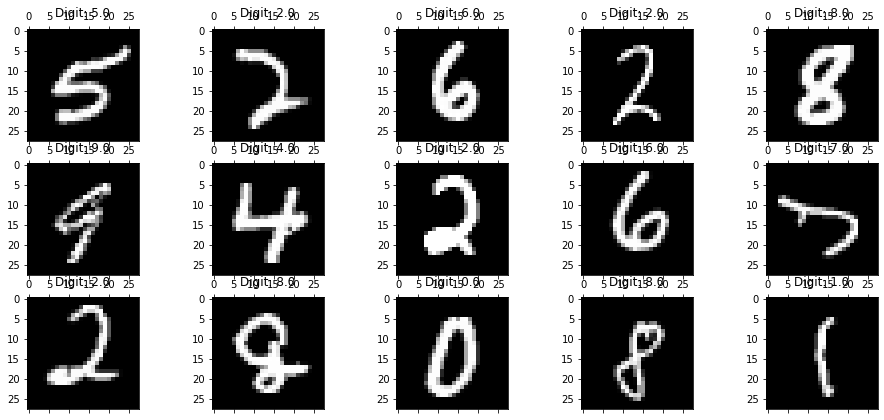

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

**PCA**

(1) Scaling하기

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

X_train_std

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_test_std = scaler.transform(X_test) 

X_test_std

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(2) PCA 진행하기

In [12]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit_transform(X_train)

array([[-5.93022667e+02, -2.73346725e+02, -2.56451601e+01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.44688843e+02, -5.85332327e+02, -7.22878291e+02, ...,
         8.60454001e-14,  3.24902345e-14,  1.02675651e-13],
       [-2.46762877e+02,  3.59312766e+02, -4.62123110e+02, ...,
         1.15121793e-13, -2.47905836e-13,  7.01028700e-14],
       ...,
       [ 4.79002167e+02, -4.69799762e+02, -8.91260823e+02, ...,
        -2.52410490e-15, -4.69471902e-16,  7.60572872e-16],
       [-8.22161674e+01,  2.37391301e+01,  6.35541651e+02, ...,
         4.06924049e-15,  1.23408085e-15,  6.52585288e-16],
       [ 4.45484046e+01,  5.39102241e+02,  5.26818671e+02, ...,
         4.01319572e-16, -3.61595301e-16,  3.46462396e-16]])

(3) 주성분 개수 구하기
- *Scree Plot*
- *Rule of Thumb*

In [13]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# Scree Plot (1)
exp_var_ratio = pca.explained_variance_ratio_
print('explained variance ratio :', exp_var_ratio) # explained variance ratio 구하기

explained variance ratio : [9.75637507e-02 7.17515366e-02 6.12193326e-02 5.40279405e-02
 4.89542742e-02 4.31212995e-02 3.28663912e-02 2.88972312e-02
 2.75973978e-02 2.34787626e-02 2.10485765e-02 2.03277775e-02
 1.71204594e-02 1.69456800e-02 1.58816714e-02 1.48362869e-02
 1.32556414e-02 1.27748474e-02 1.18628713e-02 1.15099048e-02
 1.06100396e-02 1.01119764e-02 9.62252221e-03 9.06616667e-03
 8.80853834e-03 8.39409657e-03 8.11260444e-03 7.84610373e-03
 7.37473992e-03 6.87135702e-03 6.55405545e-03 6.45596845e-03
 6.03402872e-03 5.85577544e-03 5.67417019e-03 5.42829155e-03
 5.04296983e-03 4.85702356e-03 4.80316055e-03 4.68466454e-03
 4.53917548e-03 4.45380247e-03 4.16983857e-03 3.97331806e-03
 3.82140678e-03 3.72425457e-03 3.60354911e-03 3.46716424e-03
 3.39195385e-03 3.17708597e-03 3.16110546e-03 3.09194941e-03
 2.95028191e-03 2.86028328e-03 2.82921381e-03 2.69298043e-03
 2.69166500e-03 2.56988623e-03 2.52132058e-03 2.45437559e-03
 2.39914944e-03 2.38018472e-03 2.29795292e-03 2.20844230e-

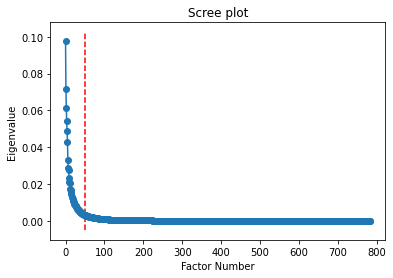

In [15]:
# Scree Plot (2)
plt.plot(range(len(exp_var_ratio)), exp_var_ratio, marker = 'o')
plt.title("Scree plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")

from kneed import KneeLocator
kn = KneeLocator(range(len(exp_var_ratio)), exp_var_ratio, curve = 'convex', direction = 'decreasing')     
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles = 'dashed', colors = 'r')    

plt.show()

In [16]:
print("Elbow Point :", kn.knee)

Elbow Point : 49


**Rule of Thumb**

: 총 분산 설명하는 비중이 70%~90% 사이에서 선택하는 방법
- 평균고유값 (σi 𝜆𝑖 ) / 𝑝 보다 작은 고유값을 갖는 주성분 제거

In [17]:
# rule of thumb
for value in [0.7, 0.8, 0.9]:
    pca = PCA(n_components = value, svd_solver = 'full')
    X_pca = pca.fit_transform(X_train)
    exp_var_ratio = pca.explained_variance_
    print(len(exp_var_ratio))

26
43
87


**Output**

[주성분의 개수 선정]
- Scree Plot = 49개
- Rule of Thumb = 26개 (70%), 43개 (80%), 87개 (90%)

따라서, PCA의 주성분 개수는 **49개**로 설정하였다.

**LDA**

(1) LDA 진행하기

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

X_lda

array([[-0.06912157,  1.13957008,  0.38794875, ..., -0.14368827,
         1.11553249, -0.59958101],
       [-0.67173413,  1.42075406, -2.19965501, ...,  3.47665626,
        -1.42106679,  1.23848873],
       [ 1.83352224, -0.94239731,  1.44931672, ...,  2.94741639,
        -0.01629124, -0.01672142],
       ...,
       [-0.03694951,  0.32853802, -1.89390555, ...,  3.27434752,
        -2.16376956,  0.08726653],
       [-0.3749295 ,  0.31745898,  0.13492208, ..., -4.4336454 ,
         0.20476323,  0.02792065],
       [ 2.35304938, -1.81565835, -0.27061984, ...,  0.23786285,
        -0.87308289, -1.60394468]])

(2) 주성분 개수 구하기

- 누적설명률



In [19]:
# 누적설명률 (1)
exp_var_ratio = lda.explained_variance_ratio_
exp_var_ratio

array([0.23755701, 0.20426112, 0.17582578, 0.10700601, 0.09465149,
       0.06888294, 0.049974  , 0.03481279, 0.02702885])

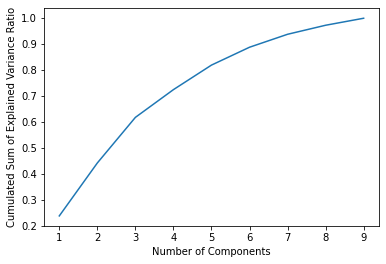

[0.23755701 0.44181813 0.61764392 0.72464993 0.81930142 0.88818436
 0.93815836 0.97297115 1.        ]


In [20]:
# 누적설명률 (2)
exp_var_ratio_cumsum = np.cumsum(exp_var_ratio)

plt.plot(list(range(1, 1+len(exp_var_ratio_cumsum))), exp_var_ratio_cumsum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()

print(exp_var_ratio_cumsum)

**Output**

[주성분의 개수 선정]
- 누적사용률 = 5개

따라서, LDA의 주성분 개수는 **5개**로 설정하였다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

특정한 틀 없이 자유롭게 해주시면 됩니다!

**PCA**

- 주성분 개수 지정 (49개)

In [21]:
pca = PCA(n_components=49)

pca.fit(X_train_std)

PCA(n_components=49)

In [22]:
PCA(copy=True, iterated_power='auto', n_components=49, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=49)

(1) RandomForestClassifier

In [26]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [27]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

clf = RandomForestClassifier()

start = time.time()
clf.fit(X_train_pca, np.ravel(y_train))
end = time.time()
elapse_time = end - start

In [28]:
print('Training time :', elapse_time)
print('Test accuracy : ', accuracy_score(y_test, clf.predict(X_test_pca)))

Training time : 50.526631593704224
Test accuracy :  0.9469285714285715


(2) SVM

In [29]:
from sklearn import svm

svc = svm.SVC(kernel = 'rbf')

start = time.time()
svc.fit(X_train_pca, y_train)
end = time.time()
elapse_time = end - start

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print('Training time :', elapse_time)
print('Test accuracy : ', accuracy_score(y_test, svc.predict(X_test_pca)))

Training time : 36.9807243347168
Test accuracy :  0.9690714285714286


**LDA**

- 주성분 개수 지정

In [31]:
lda = LinearDiscriminantAnalysis(n_components = 5)

X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test) 

(1) RandomForestClassifier

In [32]:
clf = RandomForestClassifier()

start = time.time()
clf.fit(X_train_lda, np.ravel(y_train))
end = time.time()
elapse_time = end - start

In [33]:
print('Training time :', elapse_time)
print('Test accuracy : ', accuracy_score(y_test, clf.predict(X_test_lda)))

Training time : 15.303900957107544
Test accuracy :  0.8422857142857143


(2) SVM

In [34]:
svc = svm.SVC(kernel = 'rbf')

start = time.time()
svc.fit(X_train_lda, y_train)
end = time.time()
elapse_time = end - start

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print('Training time :', elapse_time)
print('Test accuracy : ', accuracy_score(y_test, svc.predict(X_test_lda)))

Training time : 24.227909088134766
Test accuracy :  0.8432857142857143
